<h1><b>IMAGE RECOGNITION</b></h1>

Through this notebook, we will build a machine learning model for our Stunting Status prediction using LogisticRegression.

----------

## **PROBLEM DEFINITION**

1. **Problem Objective :** After collecting nutritional information from user-submitted food images, the goal is to predict the probability of a child being at risk of stunting. This prediction will be based on the analyzed nutrients and additional external factors.

2. **Problem Goals :** Develop a machine learning regression model to accurately predict the probability of stunting based on the provided data.


## **PACKAGE IMPORTING**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## **DATASET GATHERING**

In [23]:
!curl -L -o /content/archive.zip https://www.kaggle.com/api/v1/datasets/download/laurenvalentina/gizi-anak
!unzip archive.zip
print('Dataset sudah dimuat!')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 23001  100 23001    0     0  42438      0 --:--:-- --:--:-- --:--:-- 42438
Archive:  archive.zip
replace Stunting_Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Stunting_Dataset.csv    
Dataset sudah dimuat!


In [24]:
df = pd.read_csv('/content/Stunting_Dataset.csv')
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,female,56,2.9,50,11.0,90.0,Yes,No
1,female,20,3.3,49,11.1,80.5,No,No
2,male,4,2.8,48,6.5,63.0,No,No
3,female,14,2.0,49,7.0,71.0,Yes,No
4,male,32,3.2,49,11.0,88.7,Yes,No


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         6500 non-null   object 
 1   Age            6500 non-null   int64  
 2   Birth Weight   6500 non-null   float64
 3   Birth Length   6500 non-null   int64  
 4   Body Weight    6500 non-null   float64
 5   Body Length    6500 non-null   float64
 6   Breastfeeding  6500 non-null   object 
 7   Stunting       6500 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 406.4+ KB


## **DATA ANALYZING**

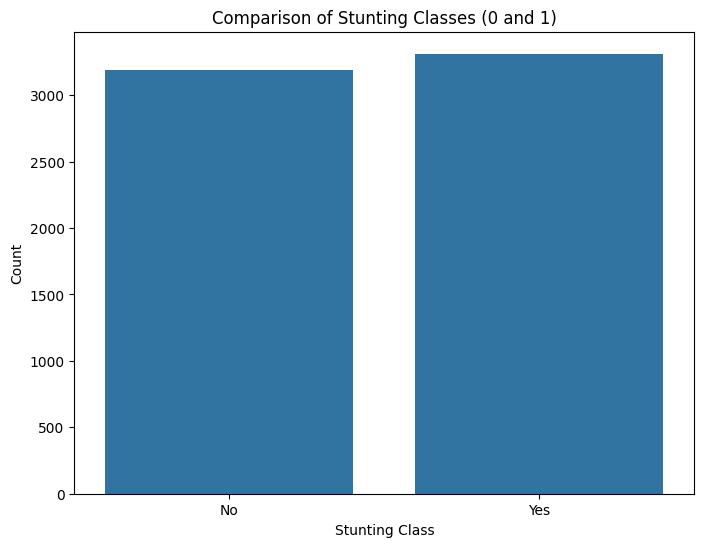

In [26]:
# Filter the dataframe for stunting classes 0 and 1
df_filtered = df[df['Stunting'] == 'Yes']

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Stunting', data=df)
plt.title('Comparison of Stunting Classes (0 and 1)')
plt.xlabel('Stunting Class')
plt.ylabel('Count')
plt.show()

In [27]:
# Create 'is_sanitized_place' and 'is_healthy_food' columns
np.random.seed(42)  # for reproducibility
n_samples = len(df)

# Create features with 90% probability aligned with stunting status
df['is_sanitized_place'] = 0
df['is_healthy_food'] = 0

# Probability of having sanitized place and healthy food for stunting cases
prob_sanitized_stunting = 0.9
prob_healthyfood_stunting = 0.9

# Probability of having sanitized place and healthy food for non-stunting cases
prob_sanitized_nonstunting = 0.1
prob_healthyfood_nonstunting = 0.1


for i in range(n_samples):
    if df['Stunting'].iloc[i] == 'No':
        df.loc[i, 'is_sanitized_place'] = 1 if np.random.rand() < prob_sanitized_stunting else 0
        df.loc[i, 'is_healthy_food'] = 1 if np.random.rand() < prob_healthyfood_stunting else 0
    else:
        df.loc[i, 'is_sanitized_place'] = 1 if np.random.rand() < prob_sanitized_nonstunting else 0
        df.loc[i, 'is_healthy_food'] = 1 if np.random.rand() < prob_healthyfood_nonstunting else 0

# Display the first few rows to verify the new columns
print(df.head())

   Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0  female   56           2.9            50         11.0         90.0   
1  female   20           3.3            49         11.1         80.5   
2    male    4           2.8            48          6.5         63.0   
3  female   14           2.0            49          7.0         71.0   
4    male   32           3.2            49         11.0         88.7   

  Breastfeeding Stunting  is_sanitized_place  is_healthy_food  
0           Yes       No                   1                0  
1            No       No                   1                1  
2            No       No                   1                1  
3           Yes       No                   1                1  
4           Yes       No                   1                1  


In [28]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Stunting' column
df['Stunting'] = df['Stunting'].replace({'Yes': 1, 'No': 0})

# Display the first few rows to verify the changes
print(df.head())

   Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0  female   56           2.9            50         11.0         90.0   
1  female   20           3.3            49         11.1         80.5   
2    male    4           2.8            48          6.5         63.0   
3  female   14           2.0            49          7.0         71.0   
4    male   32           3.2            49         11.0         88.7   

  Breastfeeding  Stunting  is_sanitized_place  is_healthy_food  
0           Yes         0                   1                0  
1            No         0                   1                1  
2            No         0                   1                1  
3           Yes         0                   1                1  
4           Yes         0                   1                1  


In [29]:
df.describe()

,Age,Birth Weight,Birth Length,Body Weight,Body Length,Stunting,is_sanitized_place,is_healthy_food
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,25.222000,2.985092,49.136923,9.809769,79.389785,0.509538,0.491077,0.497077
std,16.961179,0.349956,1.258554,3.459952,14.073021,0.499947,0.499959,0.500030
min,1.000000,1.800000,42.000000,2.900000,53.000000,0.000000,0.000000,0.000000
25%,11.000000,2.900000,49.000000,7.100000,68.900000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,49.000000,9.000000,77.000000,1.000000,0.000000,0.000000
75%,39.000000,3.200000,50.000000,12.000000,92.000000,1.000000,1.000000,1.000000
max,59.000000,4.000000,53.000000,24.500000,111.000000,1.000000,1.000000,1.000000


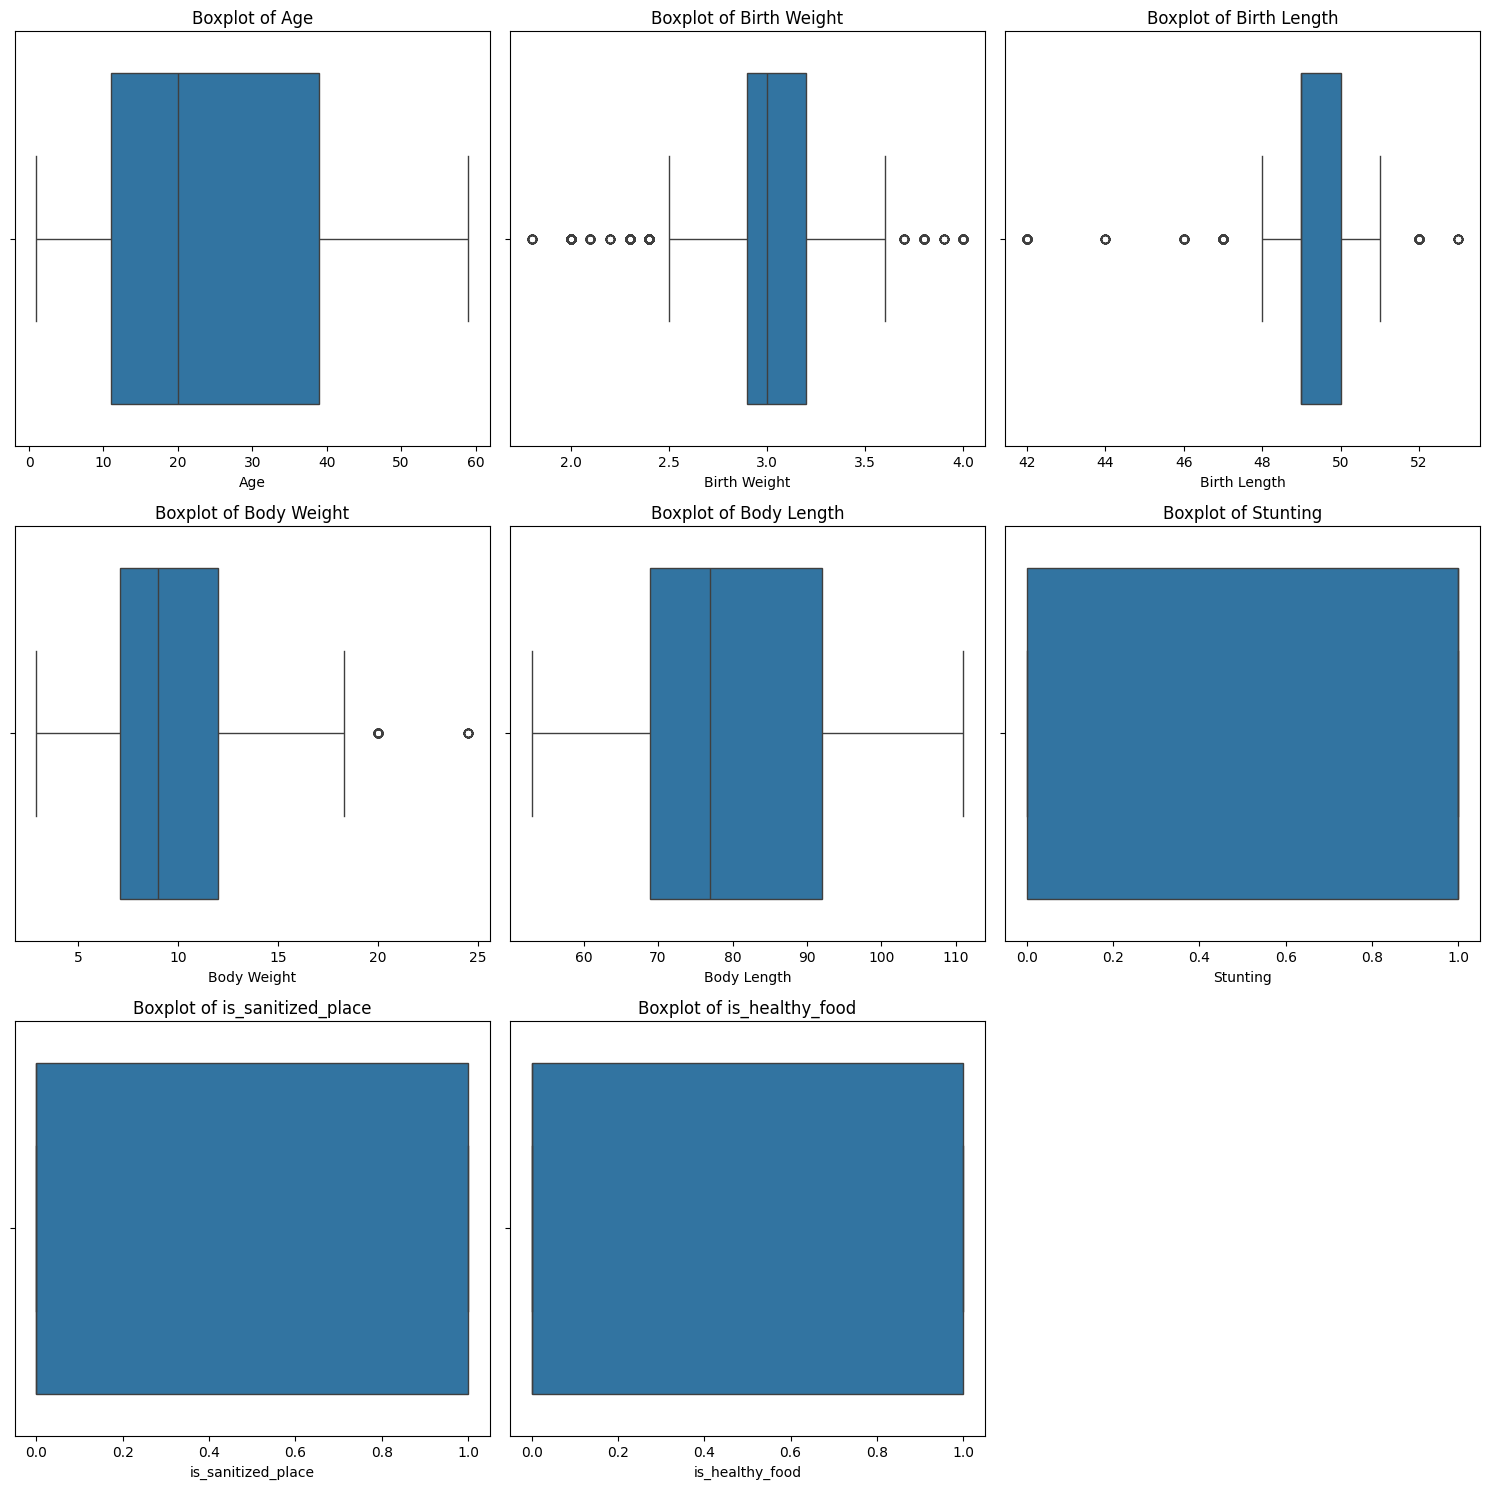

In [30]:
def detect_outliers_boxplot(df):
    """
    Detects outliers in a DataFrame using boxplots for all numerical columns.
    """
    numerical_cols = df.select_dtypes(include=['number']).columns
    num_plots = len(numerical_cols)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')

    for j in range(i+1, len(axes)):
      fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

detect_outliers_boxplot(df)

In [31]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for the 'Weight' column:
df_no_outliers = remove_outliers_iqr(df, 'Birth Weight')

# Now df_no_outliers contains the data with outliers removed from the 'Weight' column
print(df_no_outliers.describe())

               Age  Birth Weight  Birth Length  Body Weight  Body Length  \
count  5813.000000   5813.000000   5813.000000  5813.000000  5813.000000   
mean     26.135214      3.024755     49.137623    10.069052    80.238827   
std      17.244017      0.230565      1.247427     3.450522    14.152781   
min       1.000000      2.500000     42.000000     2.900000    53.000000   
25%      11.000000      2.900000     49.000000     7.600000    69.000000   
50%      21.000000      3.000000     49.000000     9.300000    78.000000   
75%      43.000000      3.200000     50.000000    12.500000    93.000000   
max      59.000000      3.600000     53.000000    24.500000   111.000000   

          Stunting  is_sanitized_place  is_healthy_food  
count  5813.000000         5813.000000      5813.000000  
mean      0.488216            0.507999         0.514020  
std       0.499904            0.499979         0.499846  
min       0.000000            0.000000         0.000000  
25%       0.000000       

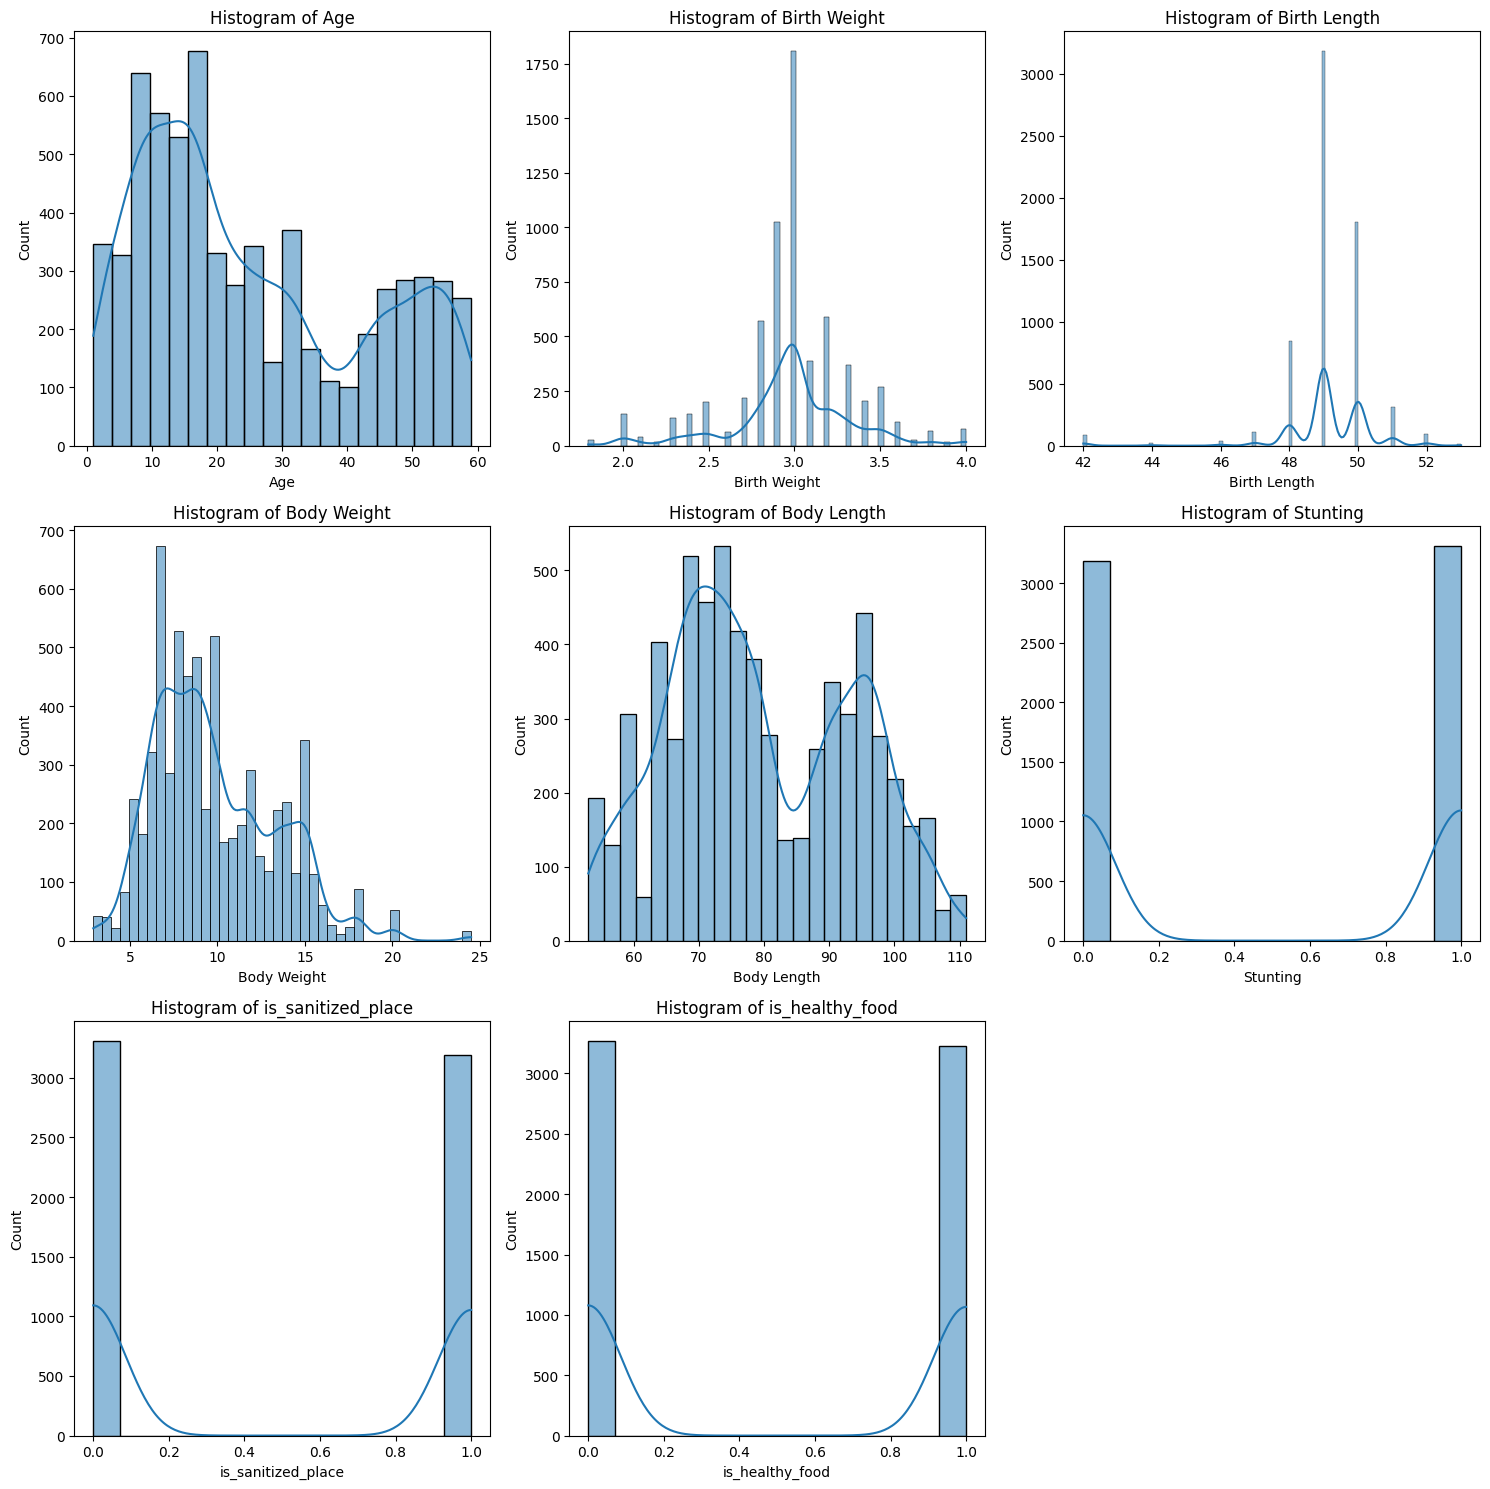

In [32]:
import warnings
warnings.filterwarnings('ignore')

# Function to create histograms for all numerical columns
def plot_histograms(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    num_plots = len(numerical_cols)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')

    for j in range(i + 1, len(axes)):  # Hide unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_histograms(df)

## **MODELLING**

### Make model for postnatal

Accuracy: 0.9576923076923077
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       656
           1       0.96      0.95      0.96       644

    accuracy                           0.96      1300
   macro avg       0.96      0.96      0.96      1300
weighted avg       0.96      0.96      0.96      1300



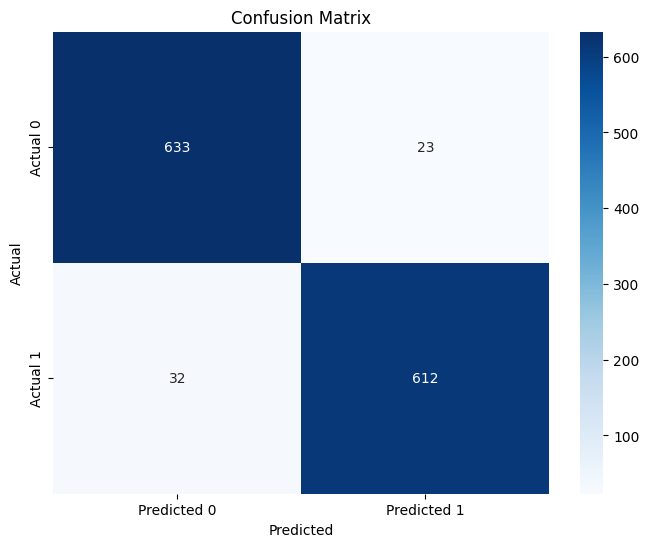

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target (y)
X = df[['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'is_sanitized_place', 'is_healthy_food']]
y = df['Stunting']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

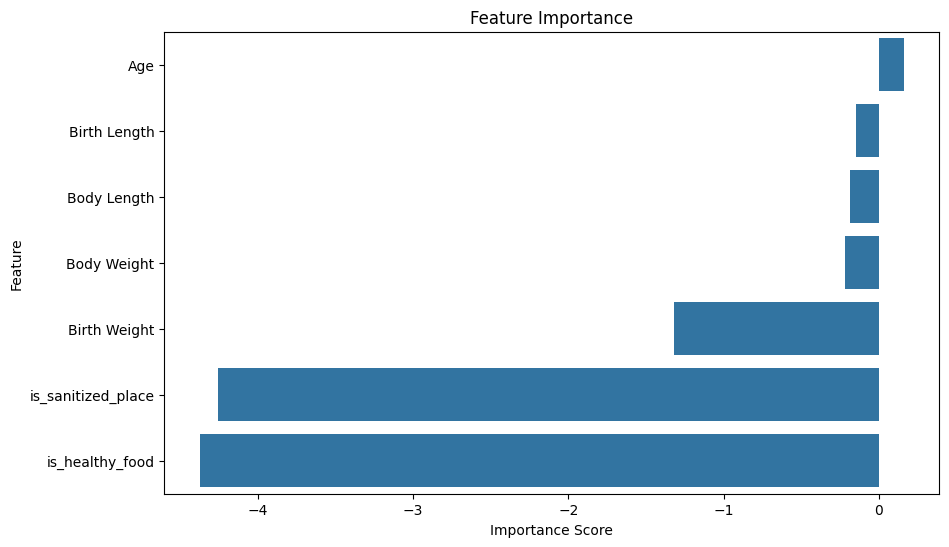

In [34]:
# Get feature importances (coefficients for logistic regression)
feature_importances = logreg_model.coef_[0]

# Create a DataFrame to visualize the importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [35]:
import joblib

joblib.dump(logreg_model, 'stunting_model.joblib')

!pip freeze > requirements.txt

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6500 non-null   int64  
 1   Birth Weight        6500 non-null   float64
 2   Birth Length        6500 non-null   int64  
 3   Body Weight         6500 non-null   float64
 4   Body Length         6500 non-null   float64
 5   is_sanitized_place  6500 non-null   int64  
 6   is_healthy_food     6500 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 355.6 KB


In [37]:
import joblib


loaded_model = joblib.load('stunting_model.joblib')

"""
Kolomnya terdiri dari:
 #   Column                Dtype
---  ------                -----
 0   Age                   int64
 1   Birth Weight          float64
 2   Birth Length          int64
 3   Body Weight           float64
 4   Body Length           float64
 5   is_sanitized_place    0 or 1
 6   is_healthy_food       0 or 1

"""
sample_input = [[2, 3.2, 50, 10, 70, 1, 1]]

predictions = loaded_model.predict(sample_input)

"""
0 = Not Stunting
1 = Stunting
"""
print(f"Predictions: {predictions}")

probability = loaded_model.predict_proba(sample_input)

"""
 #   Column                Dtype
---  ------                -----
 0   Not Stunting          float64
 1   Stunting              float64
"""
print(f"Probabilities: {probability}")

Predictions: [0]
Probabilities: [[0.9987678 0.0012322]]


### Make model for prenatal

Accuracy: 0.9138461538461539
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       656
           1       0.91      0.92      0.91       644

    accuracy                           0.91      1300
   macro avg       0.91      0.91      0.91      1300
weighted avg       0.91      0.91      0.91      1300



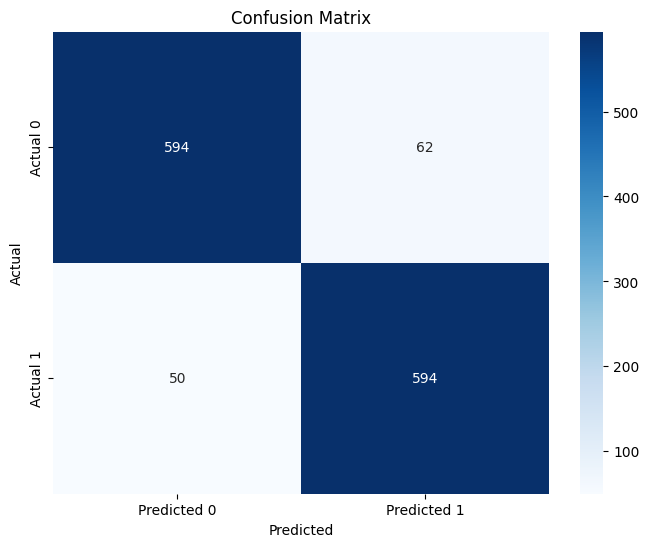

In [38]:
# Define features (X) and target (y)
X = df[['Age', 'is_sanitized_place', 'is_healthy_food']]
y = df['Stunting']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

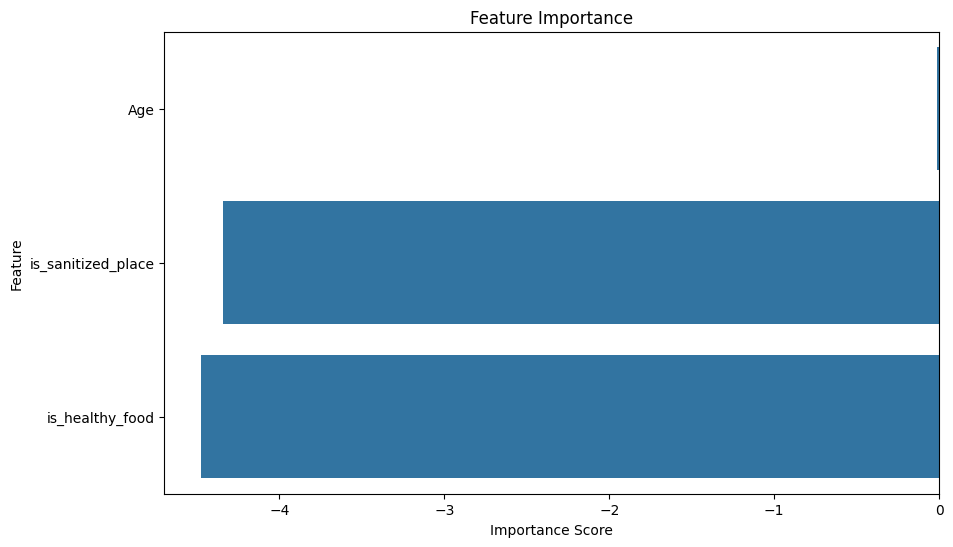

In [39]:
# Get feature importances (coefficients for logistic regression)
feature_importances = logreg_model.coef_[0]

# Create a DataFrame to visualize the importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## **MODEL EXPORTING**

In [40]:
import joblib

# Assuming 'logreg_model' is your trained model from the previous code
joblib.dump(logreg_model, 'stunting_pre_model.joblib')

!pip freeze > requirements.txt

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 6500 non-null   int64
 1   is_sanitized_place  6500 non-null   int64
 2   is_healthy_food     6500 non-null   int64
dtypes: int64(3)
memory usage: 152.5 KB


In [42]:
import joblib


loaded_model = joblib.load('stunting_pre_model.joblib')

"""
Kolomnya terdiri dari:
 #   Column                Dtype
---  ------                -----
 0   Age                   int64
 1   Birth Weight          float64
 2   Birth Length          int64
 3   Body Weight           float64
 4   Body Length           float64
 5   is_sanitized_place    0 or 1
 6   is_healthy_food       0 or 1

"""
sample_input = [[120, 1, 1]]

predictions = loaded_model.predict(sample_input)

"""
0 = Not Stunting
1 = Stunting
"""
print(f"Predictions: {predictions}")

probability = loaded_model.predict_proba(sample_input)

"""
 #   Column                Dtype
---  ------                -----
 0   Not Stunting          float64
 1   Stunting              float64
"""
print(f"Probabilities: {probability}")

Predictions: [0]
Probabilities: [[0.99653363 0.00346637]]
